In [1]:
import pandas as pd

The `read_csv` method will read in a CSV file and returns a DataFrame

In [2]:
teams = pd.read_csv('../data/processed/div1_ncaa_mbb.csv')

Call the `teams` variable to display the DataFrame created

In [3]:
teams

,orgId,schoolName,schoolShortName,conferenceId,conferenceName,conferenceShortName,sportRegion,state,stateCode,privateFlag,historicallyBlackFlag
0,2,Abilene Christian University,Abilene Christian,923,Western Athletic Conference,WAC,West Region,Texas,TX,Y,N
1,6,Alabama A&M University,Alabama A&M,916,Southwestern Athletic Conference,SWAC,South Region,Alabama,AL,N,Y
2,7,Alabama State University,Alabama State,916,Southwestern Athletic Conference,SWAC,South Region,Alabama,AL,N,Y
3,17,Alcorn State University,Alcorn State,916,Southwestern Athletic Conference,SWAC,South Region,Mississippi,MS,N,Y
4,23,American University,American,838,Patriot League,Patriot,East Region,District of Columbia,DC,Y,N
...,...,...,...,...,...,...,...,...,...,...,...
357,2915,Wofford College,Wofford,912,Southern Conference,SoCon,Southeast Region,South Carolina,SC,Y,N
358,810,Wright State University,Wright State,881,Horizon League,Horizon,Midwest Region,Ohio,OH,N,N
359,812,Xavier University,Xavier,30184,Big East Conference,Big East,Midwest Region,Ohio,OH,Y,N
360,813,Yale University,Yale,865,The Ivy League,Ivy,East Region,Connecticut,CT,Y,N


Alternatively, just run the method without declaring a variable to display the DataFrame

In [4]:
pd.read_csv('../data/processed/div1_ncaa_mbb.csv')

,orgId,schoolName,schoolShortName,conferenceId,conferenceName,conferenceShortName,sportRegion,state,stateCode,privateFlag,historicallyBlackFlag
0,2,Abilene Christian University,Abilene Christian,923,Western Athletic Conference,WAC,West Region,Texas,TX,Y,N
1,6,Alabama A&M University,Alabama A&M,916,Southwestern Athletic Conference,SWAC,South Region,Alabama,AL,N,Y
2,7,Alabama State University,Alabama State,916,Southwestern Athletic Conference,SWAC,South Region,Alabama,AL,N,Y
3,17,Alcorn State University,Alcorn State,916,Southwestern Athletic Conference,SWAC,South Region,Mississippi,MS,N,Y
4,23,American University,American,838,Patriot League,Patriot,East Region,District of Columbia,DC,Y,N
...,...,...,...,...,...,...,...,...,...,...,...
357,2915,Wofford College,Wofford,912,Southern Conference,SoCon,Southeast Region,South Carolina,SC,Y,N
358,810,Wright State University,Wright State,881,Horizon League,Horizon,Midwest Region,Ohio,OH,N,N
359,812,Xavier University,Xavier,30184,Big East Conference,Big East,Midwest Region,Ohio,OH,Y,N
360,813,Yale University,Yale,865,The Ivy League,Ivy,East Region,Connecticut,CT,Y,N


Use the `head()` and `tail()` methods to display a fixed number of entries from the beginning or end of the dataset. These methods create a new DataFrame. By default, they return the first/last 5 rows.

In [5]:
teams.head()

,orgId,schoolName,schoolShortName,conferenceId,conferenceName,conferenceShortName,sportRegion,state,stateCode,privateFlag,historicallyBlackFlag
0,2,Abilene Christian University,Abilene Christian,923,Western Athletic Conference,WAC,West Region,Texas,TX,Y,N
1,6,Alabama A&M University,Alabama A&M,916,Southwestern Athletic Conference,SWAC,South Region,Alabama,AL,N,Y
2,7,Alabama State University,Alabama State,916,Southwestern Athletic Conference,SWAC,South Region,Alabama,AL,N,Y
3,17,Alcorn State University,Alcorn State,916,Southwestern Athletic Conference,SWAC,South Region,Mississippi,MS,N,Y
4,23,American University,American,838,Patriot League,Patriot,East Region,District of Columbia,DC,Y,N


In [6]:
teams.tail()

,orgId,schoolName,schoolShortName,conferenceId,conferenceName,conferenceShortName,sportRegion,state,stateCode,privateFlag,historicallyBlackFlag
357,2915,Wofford College,Wofford,912,Southern Conference,SoCon,Southeast Region,South Carolina,SC,Y,N
358,810,Wright State University,Wright State,881,Horizon League,Horizon,Midwest Region,Ohio,OH,N,N
359,812,Xavier University,Xavier,30184,Big East Conference,Big East,Midwest Region,Ohio,OH,Y,N
360,813,Yale University,Yale,865,The Ivy League,Ivy,East Region,Connecticut,CT,Y,N
361,817,Youngstown State University,Youngstown State,881,Horizon League,Horizon,Midwest Region,Ohio,OH,N,N


In [7]:
first25 = teams.head(25)
first25

,orgId,schoolName,schoolShortName,conferenceId,conferenceName,conferenceShortName,sportRegion,state,stateCode,privateFlag,historicallyBlackFlag
0,2,Abilene Christian University,Abilene Christian,923,Western Athletic Conference,WAC,West Region,Texas,TX,Y,N
1,6,Alabama A&M University,Alabama A&M,916,Southwestern Athletic Conference,SWAC,South Region,Alabama,AL,N,Y
2,7,Alabama State University,Alabama State,916,Southwestern Athletic Conference,SWAC,South Region,Alabama,AL,N,Y
3,17,Alcorn State University,Alcorn State,916,Southwestern Athletic Conference,SWAC,South Region,Mississippi,MS,N,Y
4,23,American University,American,838,Patriot League,Patriot,East Region,District of Columbia,DC,Y,N
5,27,Appalachian State University,Appalachian State,818,Sun Belt Conference,Sun Belt,South Region,North Carolina,NC,N,N
6,28,Arizona State University,Arizona State,905,Pac-12 Conference,Pac-12,West Region,Arizona,AZ,N,N
7,30,Arkansas State University,Arkansas State,818,Sun Belt Conference,Sun Belt,South Region,Arkansas,AR,N,N
8,37,Auburn University,Auburn,911,Southeastern Conference,SEC,Southeast Region,Alabama,AL,N,N
9,43,Austin Peay State University,Austin Peay,920,Atlantic Sun Conference,ASUN,Southeast Region,Tennessee,TN,N,N


In [8]:
last15 = teams.tail(15)
last15

,orgId,schoolName,schoolShortName,conferenceId,conferenceName,conferenceShortName,sportRegion,state,stateCode,privateFlag,historicallyBlackFlag
347,754,Washington State University,Washington State,905,Pac-12 Conference,Pac-12,West Region,Washington,WA,N,N
348,758,Weber State University,Weber State,825,Big Sky Conference,Big Sky,West Region,Utah,UT,N,N
349,768,West Virginia University,West Virginia,25354,Big 12 Conference,Big 12,South Region,West Virginia,WV,N,N
350,769,Western Carolina University,Western Carolina,912,Southern Conference,SoCon,Southeast Region,North Carolina,NC,N,N
351,771,Western Illinois University,Western Illinois,902,Ohio Valley Conference,OVC,South Region,Illinois,IL,N,N
352,772,Western Kentucky University,Western Kentucky,24312,Conference USA,C-USA,South Region,Kentucky,KY,N,N
353,774,Western Michigan University,Western Michigan,875,Mid-American Conference,MAC,Midwest Region,Michigan,MI,N,N
354,782,Wichita State University,Wichita State,823,American Athletic Conference,AAC,Southeast Region,Kansas,KS,N,N
355,786,William & Mary,William & Mary,837,Coastal Athletic Association,CAA,East Region,Virginia,VA,N,N
356,792,Winthrop University,Winthrop,826,Big South Conference,Big South,Southeast Region,South Carolina,SC,N,N


Use the `info()` method for a concise summary of the DataFrame, and `dtypes` method for the data types in the DataFrame

In [9]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   orgId                  362 non-null    int64 
 1   schoolName             362 non-null    object
 2   schoolShortName        362 non-null    object
 3   conferenceId           362 non-null    int64 
 4   conferenceName         362 non-null    object
 5   conferenceShortName    362 non-null    object
 6   sportRegion            362 non-null    object
 7   state                  362 non-null    object
 8   stateCode              362 non-null    object
 9   privateFlag            362 non-null    object
 10  historicallyBlackFlag  362 non-null    object
dtypes: int64(2), object(9)
memory usage: 31.2+ KB


In [10]:
teams.dtypes

orgId                     int64
schoolName               object
schoolShortName          object
conferenceId              int64
conferenceName           object
conferenceShortName      object
sportRegion              object
state                    object
stateCode                object
privateFlag              object
historicallyBlackFlag    object
dtype: object

Some other useful methods to get information about the dataset:

`type(<arg>)`  -  python method, returns the type of the argument `<arg>` passed

`len(<arg>)`  -  python method, returns the length of the argument `<arg>` passed

`columns`  -  pandas method, returns a list of the column headings

`shape`  -  pandas method, returns a tuple of the total dataset rows and columns

`size`  -  pandas method, returns an integer of the total dataset rows multiplied by columns

`pd.options.display.min_rows = <int>`  -  pandas method, changes the default number `<int>` of rows to display

`select_dtypes(include=[<incTypes>], exclude=[<excTypes>])`  -  pandas method, restricts output to display only the data types `<incTypes>` and/or `<excTypes>` passed

In [11]:
type(teams)

pandas.core.frame.DataFrame

In [12]:
type(first25)

pandas.core.frame.DataFrame

In [13]:
type(last15)

pandas.core.frame.DataFrame

In [14]:
teamsLength = len(teams)
first25Length = len(first25)
last15Length = len(last15)

print(f"The length of the teams DataFrame is {teamsLength}.")
print(f"The length of the first25 DataFrame is {first25Length}.")
print(f"The length of the last15 DataFrame is {last15Length}.")

The length of the teams DataFrame is 362.
The length of the first25 DataFrame is 25.
The length of the last15 DataFrame is 15.


In [15]:
teams.columns

Index(['orgId', 'schoolName', 'schoolShortName', 'conferenceId',
       'conferenceName', 'conferenceShortName', 'sportRegion', 'state',
       'stateCode', 'privateFlag', 'historicallyBlackFlag'],
      dtype='object')

In [16]:
teams.shape

(362, 11)

In [17]:
teams.size

3982

In [18]:
rowsToShow = 8
pd.options.display.min_rows = rowsToShow
teams.select_dtypes(exclude=["object"])

,orgId,conferenceId
0,2,923
1,6,916
2,7,916
3,17,916
...,...,...
358,810,881
359,812,30184
360,813,865
361,817,881


*Good idea to include markdown description of the dataset, including details about each column heading...*

## NCAA Division I Men's Basketball Teams

This dataset includes basic identification data for all NCAA Division I men's basketball programs.

* `orgId` - team's unique id
* `schoolName` - team's school name
* `schoolShortName` - team's shortened school name
* `conferenceId` - team's conference id
* `conferenceName` - team's conference name
* `conferenceShortName` - team's shortened conference name 
* `sportRegion` - team's geographical region
* `state` - team's state
* `stateCode` - team's state code
* `privateFlag` - is the team's school private (Y) or not (N)
* `historicallyBlackFlag` - is the team's school HBCU (Y) or not (N)

In [20]:
teams.describe()

,orgId,conferenceId
count,362.000000,362.000000
mean,1178.480663,3425.977901
std,4221.567957,7565.293783
min,2.000000,0.000000
25%,229.500000,827.000000
50%,459.500000,876.000000
75%,663.750000,914.000000
max,30136.000000,30184.000000


In [21]:
teams.describe(include="O")

,schoolName,schoolShortName,conferenceName,conferenceShortName,sportRegion,state,stateCode,privateFlag,historicallyBlackFlag
count,362,362,362,362,362,362,362,362,362
unique,362,362,33,33,5,50,50,2,2
top,Abilene Christian University,Abilene Christian,Atlantic 10 Conference,A-10,East Region,California,CA,N,N
freq,1,1,15,15,91,26,26,239,339


In [22]:
teams.describe()

,orgId,conferenceId
count,362.000000,362.000000
mean,1178.480663,3425.977901
std,4221.567957,7565.293783
min,2.000000,0.000000
25%,229.500000,827.000000
50%,459.500000,876.000000
75%,663.750000,914.000000
max,30136.000000,30184.000000


In [25]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   orgId                  362 non-null    int64 
 1   schoolName             362 non-null    object
 2   schoolShortName        362 non-null    object
 3   conferenceId           362 non-null    int64 
 4   conferenceName         362 non-null    object
 5   conferenceShortName    362 non-null    object
 6   sportRegion            362 non-null    object
 7   state                  362 non-null    object
 8   stateCode              362 non-null    object
 9   privateFlag            362 non-null    object
 10  historicallyBlackFlag  362 non-null    object
dtypes: int64(2), object(9)
memory usage: 31.2+ KB


<Axes: title={'center': 'Teams by Geographic Region'}, xlabel='Geographic Region', ylabel='Number of Teams'>

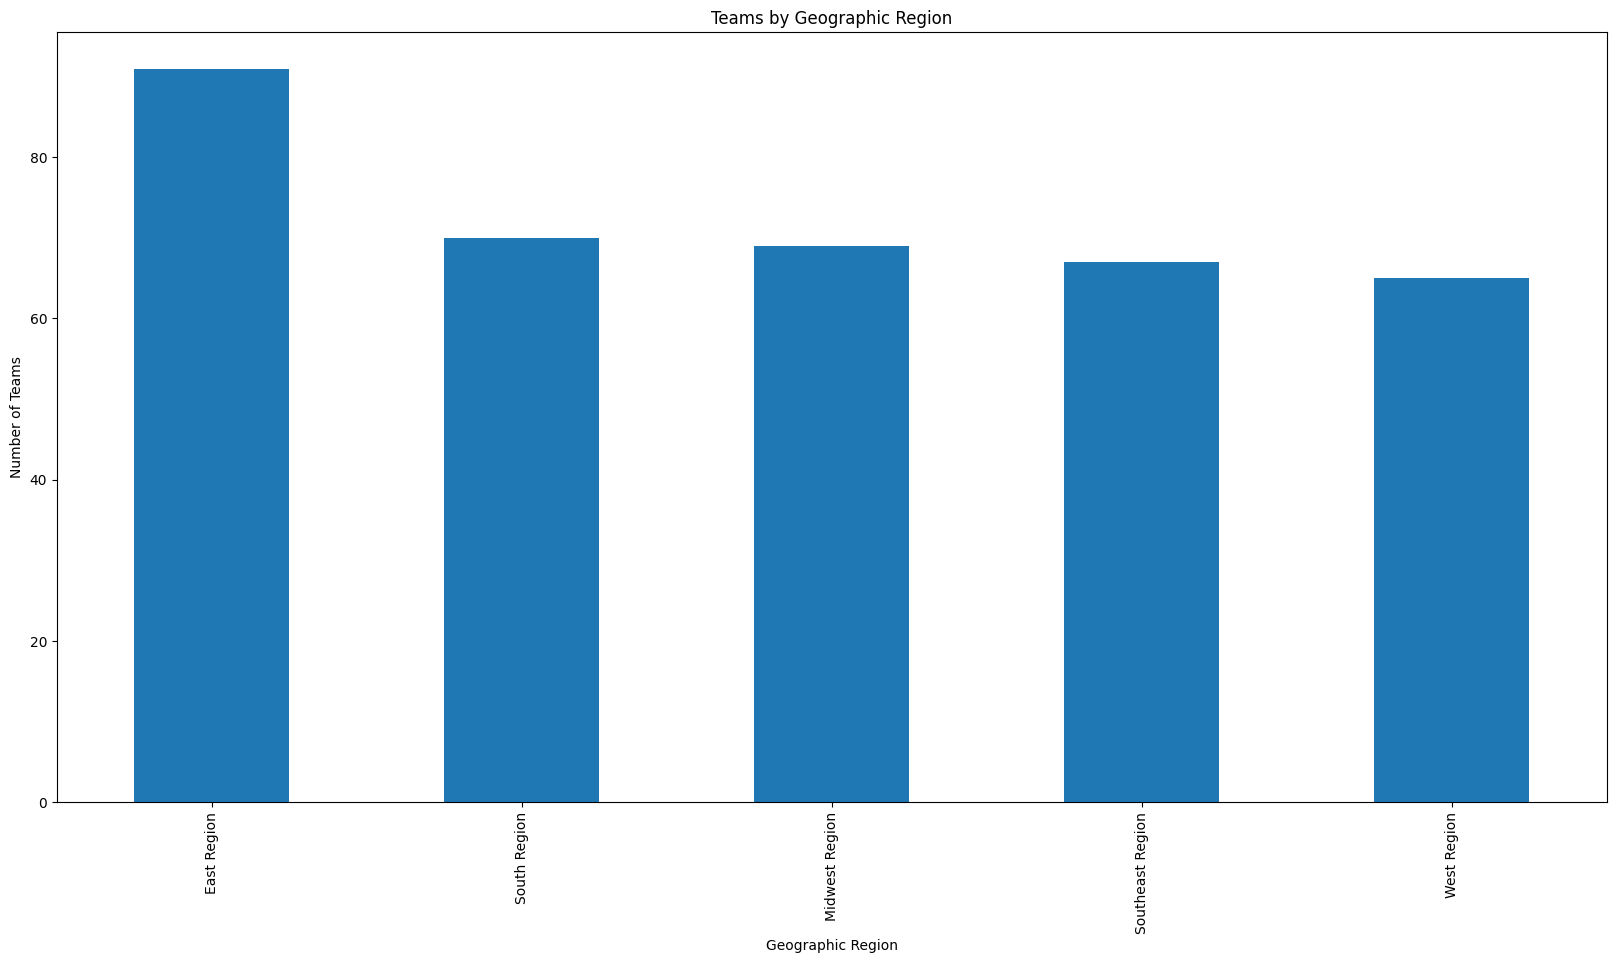

In [39]:
# create a horizontal bar chart of teams by geographic region, including the count number inside the bars
teams["sportRegion"].value_counts().plot(
    kind="bar",
    figsize=(20, 10),
    title="Teams by Geographic Region",
    xlabel="Geographic Region",
    ylabel="Number of Teams",
)

<Axes: title={'center': 'Teams by State'}, xlabel='State', ylabel='Number of Teams'>

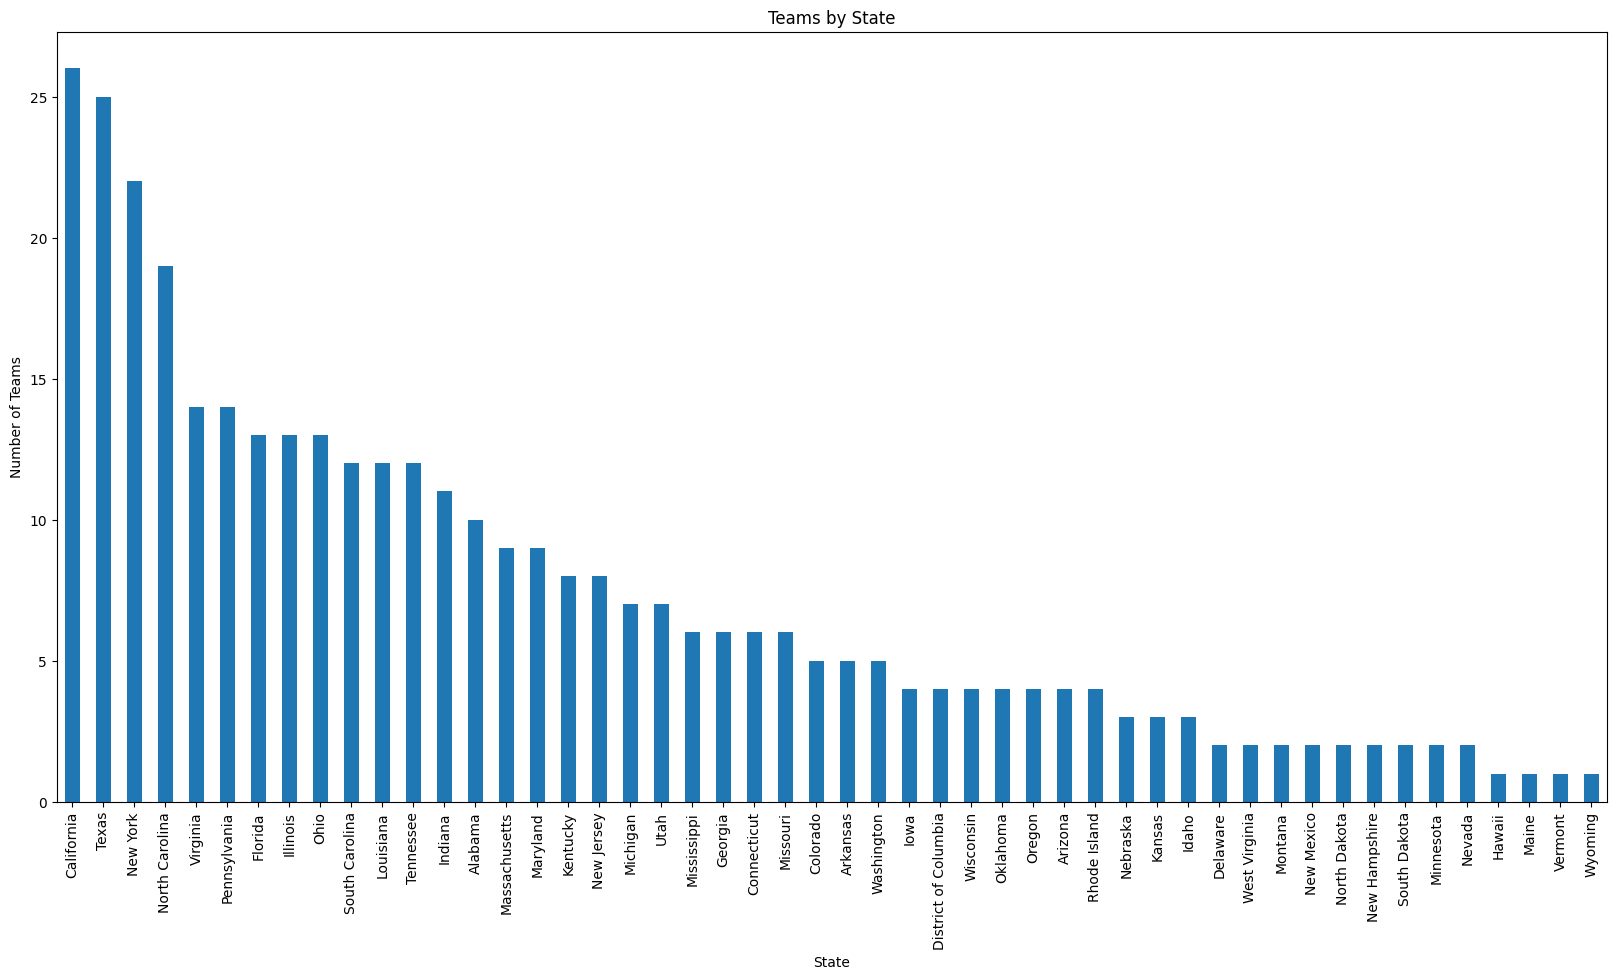

In [40]:
teams["state"].value_counts().plot(
    kind="bar",
    figsize=(20, 10),
    title="Teams by State",
    xlabel="State",
    ylabel="Number of Teams",
)

In [ ]:
teams2